In [5]:
import pandas as pd
import sklearn
import sklearn.cluster
from hdbscan import HDBSCAN
from umap import UMAP
from clustomat.clustomat import cluster, reduce_2d, plot, NoReduction

In [14]:
df = pd.read_csv("data/data.tsv", sep="\t")
df["answers"] = df["answers"].map(eval)
df

,party,answers
0,CDU/CSU,"[-1, 1, -1, -1, 0, 1, -1, -1, -1, 0, -1, 1, -1..."
1,SPD,"[1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1,..."
2,AfD,"[-1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -..."
3,FDP,"[-1, 1, 1, 0, -1, 1, 0, -1, 0, -1, -1, 1, 1, 0..."
4,DIE LINKE,"[1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, ..."
5,GRÜNE,"[1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, ..."
6,FREIE WÄHLER,"[-1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 0, 1..."
7,Die PARTEI,"[1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, ..."
8,Tierschutzpartei,"[1, -1, 1, -1, 1, -1, 1, 1, -1, 0, -1, 0, 0, 1..."
9,NPD,"[-1, 1, -1, 1, 0, -1, -1, 1, 1, 1, 1, -1, 1, -..."


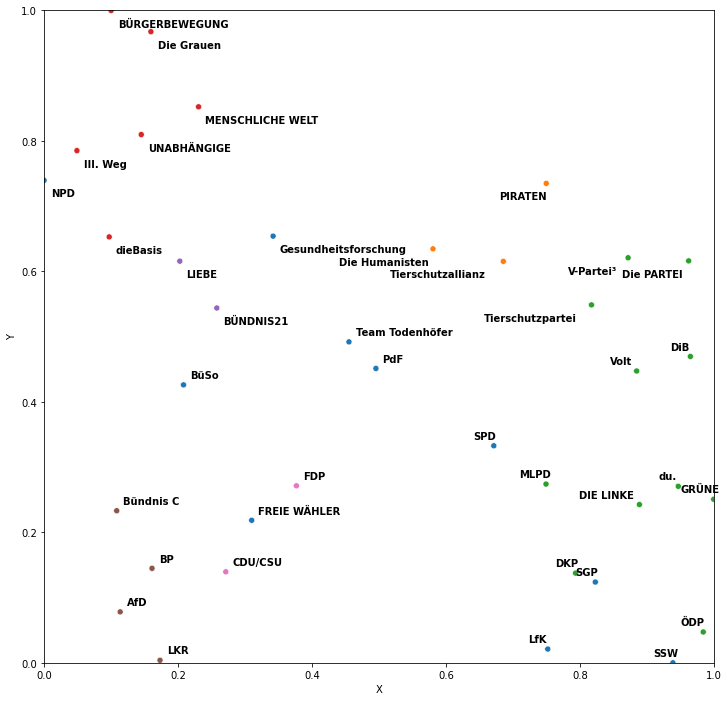

In [33]:
df = cluster(red_model=UMAP(n_components=36, set_op_mix_ratio=0.6,random_state=42),
    cluster_model=HDBSCAN(min_cluster_size=2),
    df=df)
df = reduce_2d(reducer_2d=UMAP(n_components=2, set_op_mix_ratio=0.6, random_state=42), 
    df=df)
plot(df=df, 
    voronoi=False)

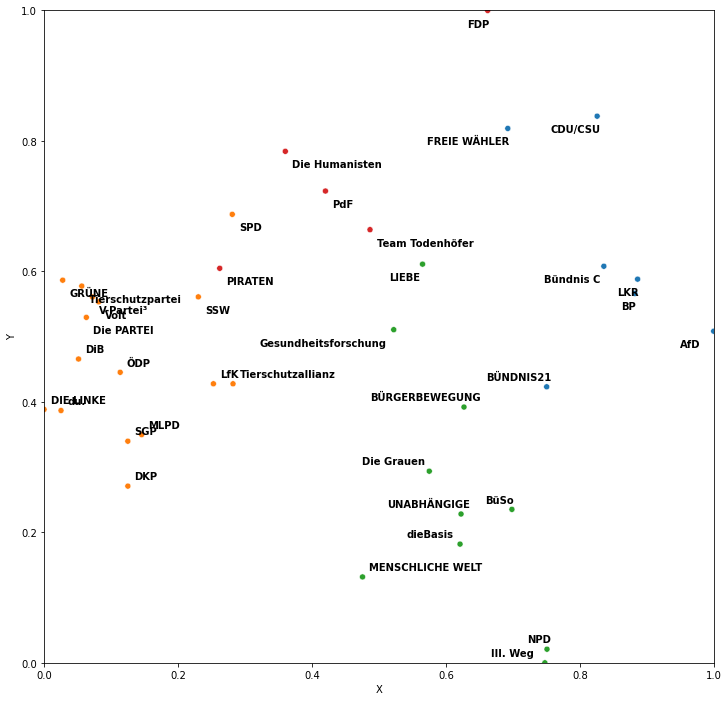

In [35]:
df = cluster(red_model=NoReduction(),
    cluster_model=sklearn.cluster.KMeans(n_clusters=4),
    df=df)
df = reduce_2d(reducer_2d=sklearn.decomposition.PCA(n_components=2, random_state=42), 
    df=df)
plot(df=df, 
    voronoi=False)